# Name : Manan Sharma

# Data Science and Business Analytics Internship at the Sparks Foundation

# Goal - From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually using Unsupervised Machine Learning (KMeans) 

In [2]:
# Importing necessary libraries that will be used
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [4]:
# Importing iris dataset in dataframe
df = pd.read_csv("iris.csv")
df.head()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


# Data Exploration

In [5]:
# First of all, delete the "Unnamed: 0", as this is of no use
df = df.drop(labels=['Unnamed: 0'],axis=1)
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
df.tail()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [7]:
df.shape  #So, it has 150 rows and 5 columns

(150, 5)

In [8]:
df.describe()   #Basic Statistics of the dataset

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
df.info()   #Data Profiling

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal.Length    150 non-null float64
Sepal.Width     150 non-null float64
Petal.Length    150 non-null float64
Petal.Width     150 non-null float64
Species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


# Checking Null values

In [11]:
df.isnull().sum()  #So, it does not have any null values

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

# Detecting outliers and handling them

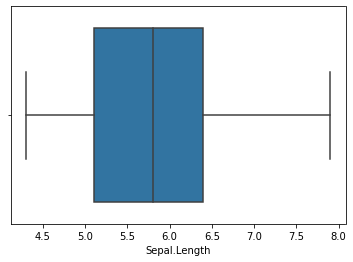

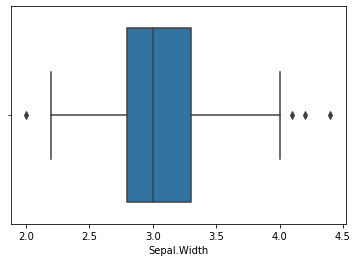

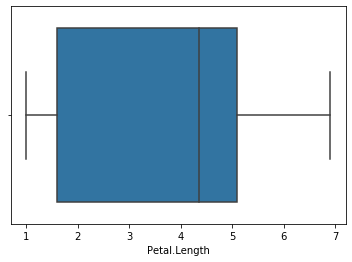

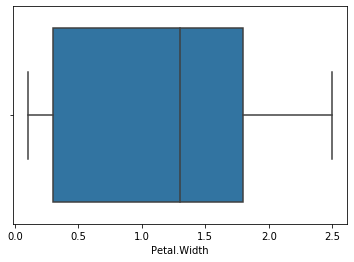

In [13]:
for i in df.columns:
    if df[i].dtypes != "object":
        sb.boxplot(df[i])
        plt.show()

So, we can see through boxplot that (Sepal.Width) feature has few outliers above Upper Whisker and 1 outlier below Lower Whisker

# Let's handle outliers in Sepal Width

In [17]:
#Let's remove outliers on the basis of Floor and Wall of dataset
Q1 = df['Sepal.Width'].quantile(0.02)   #Floor of the dataset
Q3 = df['Sepal.Width'].quantile(0.98)   #Wall of the dataset
df2 = df[(df['Sepal.Width']>=Q1) & (df['Sepal.Width']<=Q3)]
df2.shape

(146, 5)

In [18]:
df2.head(6)   #Now the data is good enough to proceed

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa


# Exploratory Data Analysis

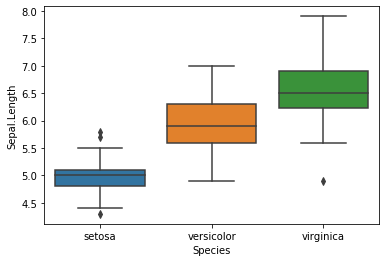

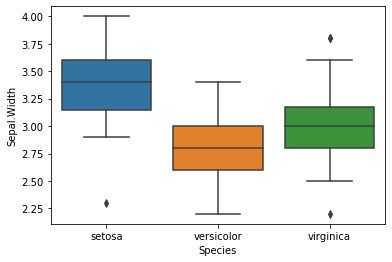

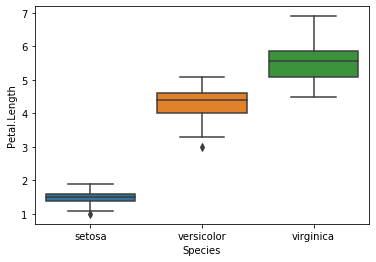

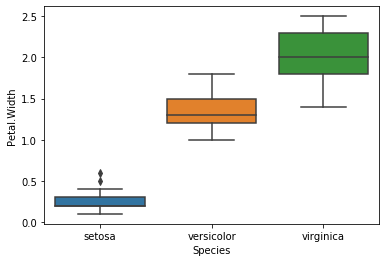

In [20]:
for i in df2.columns:
    if df2[i].dtypes != "object":
        sb.boxplot(df2['Species'],df2[i])     #Hence the features with Species has linear realtionship
        plt.show()

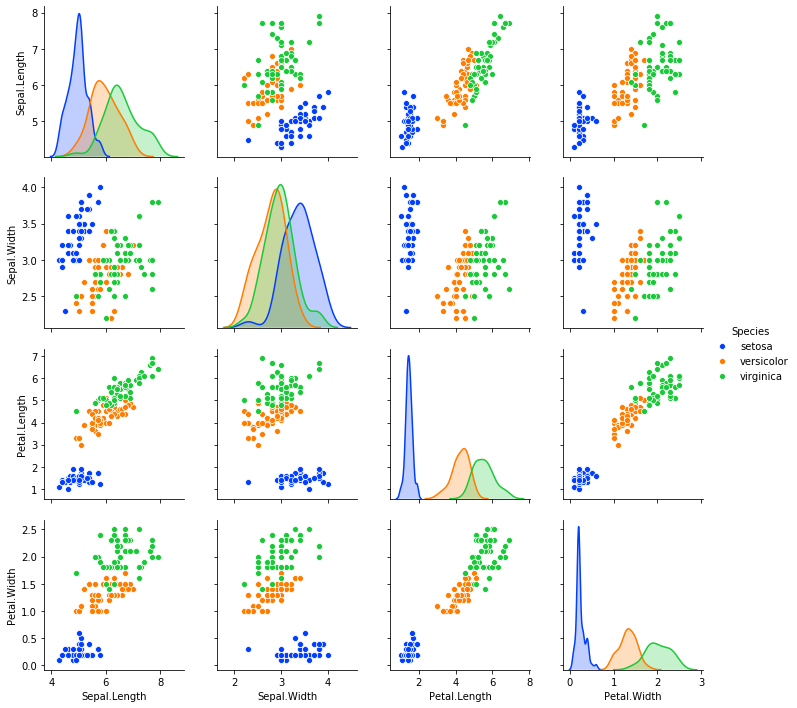

In [21]:
sb.pairplot(data=df2,hue="Species",palette="bright")

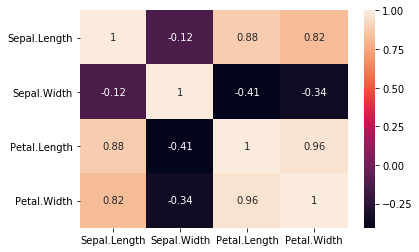

In [23]:
#Features Correlation
sb.heatmap(df2.corr(),annot = True)
#So, we can see that Petal Width and Petal Length has high correlation along with Sepal Length

In [34]:
df2_new = df2

# Now let's check best value of K for making clusters using WCSS(Within Clusters Sumof Squares)

In [31]:
k = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]    #a range of k to decide which is best
WCSS = []     
features = df2.iloc[:, [0, 1, 2, 3]].values
for i in k:
   km = KMeans(n_clusters=i,init = 'k-means++',random_state = 100)
   model = km.fit(features)
   WCSS.append(model.inertia_)          #the value of within cluster sum of squares from inertia

Text(0.5, 1.0, 'Elbow curve')

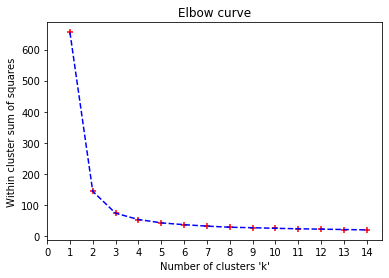

In [32]:
plt.scatter(k,WCSS,marker="+",c="red")       
plt.plot(k,WCSS,c="blue",linestyle='dashed')
plt.xlabel("Number of clusters 'k'")           #best value of k is decided by steep decrease of value of wcss,is best k
plt.ylabel("Within cluster sum of squares")
plt.xticks(range(0,15,1))       #for value of k from 0 to 15 in graph
plt.title("Elbow curve") 

#Hence at k=3 , there is a steep decrease in Elbow curve, so this is best value of K

# Model building

In [47]:
km = KMeans(n_clusters = 3,random_state = 0)
model = km.fit_predict(features) 

In [38]:
col=[]          #to color different clusters differentiate with colors
for i in df2.cluster_label:
   if(i == 0):
       col.append("red")
   elif(i == 1):
       col.append("blue")
   elif(i == 2):
       col.append("orange")
   else:
       col.append("black")

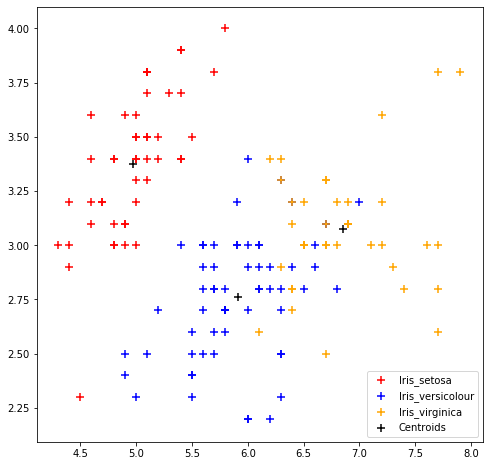

In [54]:
plt.figure(figsize=(8,8))
plt.scatter(features[model == 0, 0], features[model == 0, 1], s=50,c = 'red', label = 'Iris_setosa',marker="+")
plt.scatter(features[model == 1, 0], features[model == 1, 1], s=50,c = 'blue', label = 'Iris_versicolour',marker="+")
plt.scatter(features[model == 2, 0], features[model == 2, 1], s=50, c = 'orange', label = 'Iris_virginica',marker="+")

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1],s=50, c = 'black', label = 'Centroids',marker="+")
plt.legend()